<a href="https://colab.research.google.com/github/UpamaKr/project-on-natural-language-processing/blob/main/Project_on_Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [8]:
url = 'https://raw.githubusercontent.com/UpamaKr/project-on-natural-language-processing/main/yelp.csv'
yelp = pd.read_csv(url)

In [9]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [10]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [11]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


 Create a new column called "text length" which is the number of words in the text column

In [13]:
yelp['text length'] = yelp['text'].apply(len)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

Use of FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings.

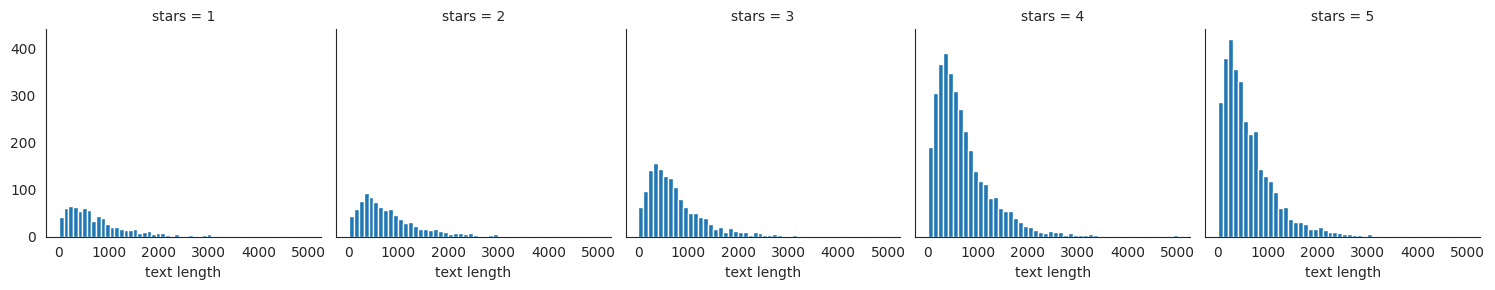

In [44]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length', bins=50)

Create a boxplot of text length for each star category.

<Axes: xlabel='stars', ylabel='text length'>

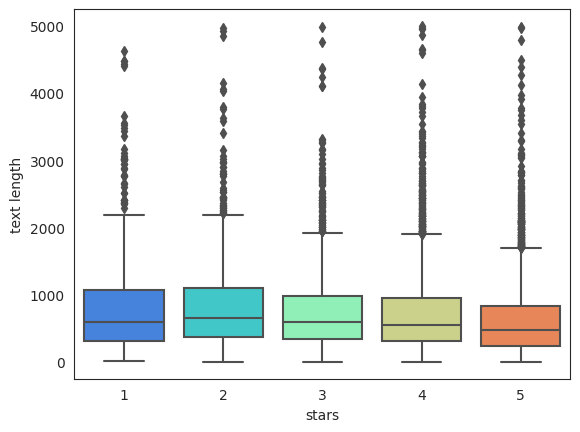

In [17]:
sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow')

<Axes: xlabel='stars', ylabel='count'>

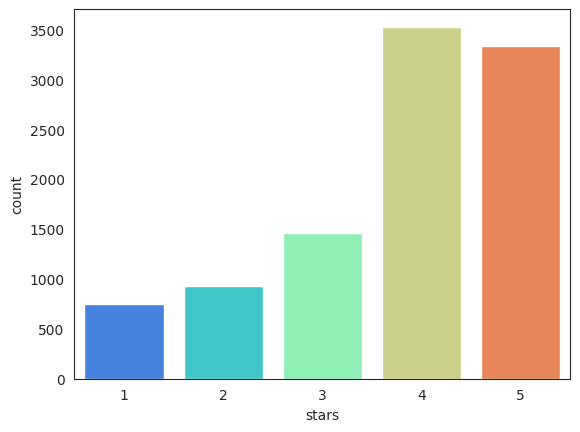

In [18]:
sns.countplot(x='stars',data=yelp,palette='rainbow')

 Use groupby to get the mean values of the numerical columns

In [19]:
stars = yelp.groupby('stars').mean()
stars

<ipython-input-19-4a60149d024c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stars = yelp.groupby('stars').mean()


,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


the corr() method on that groupby dataframe to produce this dataframe

In [20]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


use seaborn to create a heatmap based off that .corr() dataframe

<Axes: >

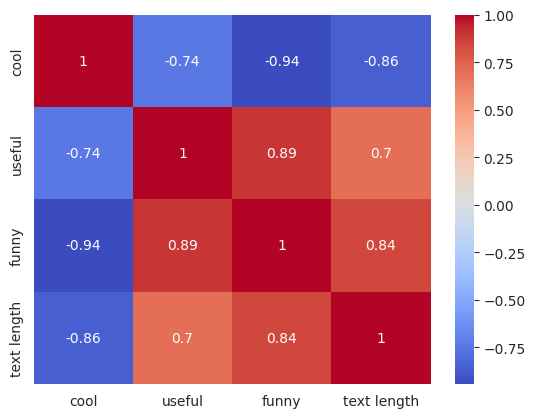

In [22]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

NLP Classification Task

Creating a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews

In [71]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

Creating two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class

In [72]:
X = yelp_class['text']
y = yelp_class['stars']

Import CountVectorizer and create a CountVectorizer object.

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [74]:
X = cv.fit_transform(X)

 Use of fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Saving this result by overwriting X.

**Train Test Split**

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [77]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

Now fit nb using the training data.

In [78]:
nb.fit(X_train,y_train)

MultinomialNB()

**Predictions and Evaluations**

In [79]:
predictions = nb.predict(X_test)

 Create a confusion matrix and classification report using these predictions and y_test

In [80]:
from sklearn.metrics import confusion_matrix,classification_report

In [81]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



So there is a much higher probability of having a test set made up of mostly 5-star reviews. Also, I'm assuming that training a model on a data set that does not have a balanced proportion of labels will lead to predictions that favor the label with the higher count.

**Using Text Processing**

In [82]:
from sklearn.feature_extraction.text import  TfidfTransformer

In [83]:
from sklearn.pipeline import Pipeline

**creating a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [84]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer(norm=None)),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

Using the Pipeline

Train Test Split

In [85]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

fitting the pipeline to the training data

In [86]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()),
                ('tfidf', TfidfTransformer(norm=None)),
                ('classifier', MultinomialNB())])

using the pipeline to predict from the X_test and creating a classification report and confusion matrix

In [87]:
predictions = pipeline.predict(X_test)

In [88]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[183  45]
 [ 50 948]]
              precision    recall  f1-score   support

           1       0.79      0.80      0.79       228
           5       0.95      0.95      0.95       998

    accuracy                           0.92      1226
   macro avg       0.87      0.88      0.87      1226
weighted avg       0.92      0.92      0.92      1226



 the model has an accuracy of 0.92, which means it made the correct prediction for 92% of the samples.

Comparison:

Precision: The NLP Classification model has a higher precision for class 1 (0.88 vs 0.79), but a slightly lower precision for class 5 (0.93 vs 0.95).

Recall: The TF-IDF model has a higher recall for class 1 (0.80 vs 0.70), but a lower recall for class 5 (0.95 vs 0.98).

F1-Score: The F1-scores are quite similar for both models and both classes.

Accuracy: The NLP Classification model has a slightly higher overall accuracy (0.93 vs 0.92).